# 0.) Import and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
#drive.mount('/content/gdrive/', force_remount = True)
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Country-data.csv', sep = ',')

Saving Country-data.csv to Country-data (1).csv


In [11]:
names = df[['country']].copy()
X = df.drop('country', axis = 1)

In [12]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [14]:
kmeans = KMeans(n_clusters = 5).fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [15]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

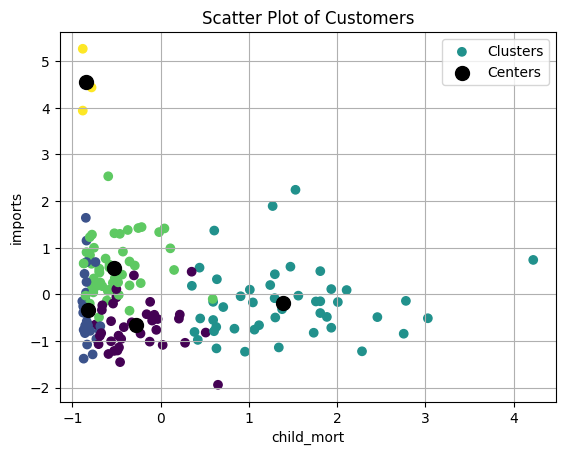

In [16]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 3


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [17]:
WCSSs = []
Ks = range(1,15)
for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30).fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

In [18]:
WCSSs = [KMeans(n_clusters = k, n_init = 30).fit(X_scaled).inertia_ for k in range(1,15)]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

Text(0, 0.5, 'WCSSs')

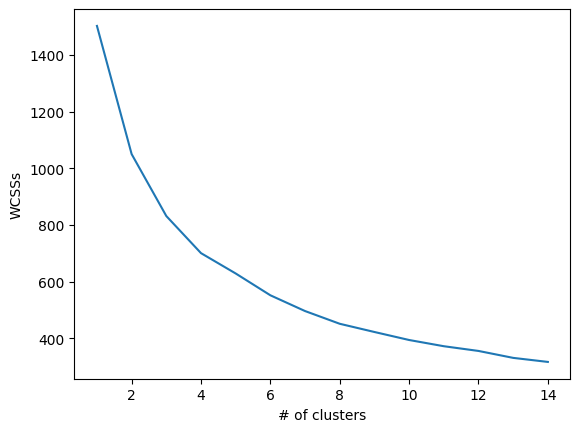

In [19]:
plt.plot(Ks, WCSSs)
plt.xlabel('# of clusters')
plt.ylabel('WCSSs')

# I chose 2 becuase economy can be classified to 2 categories, developed and developing, and WCSS didn't down too much when cluster number increases.

# 6.) Do the same for a silhoutte plot

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
SSs = []
Ks = range(2,15)
for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30).fit(X_scaled)
    sil = silhouette_score(X_scaled, kmeans.labels_)
    SSs.append(sil)

Text(0, 0.5, 'SSs')

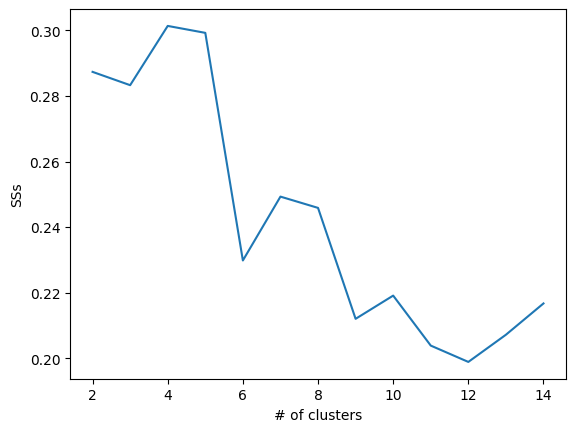

In [22]:
plt.plot(Ks, SSs)
plt.xlabel('# of clusters')
plt.ylabel('SSs')

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [23]:
kmeans = KMeans(n_clusters = 2, n_init = 30).fit(X_scaled)

In [24]:
pred = pd.DataFrame(kmeans.labels_)

In [25]:
output = pd.concat([pred, df], axis = 1)

In [26]:
country_0 = list(output.loc[output[0] == 0, 'country'])

In [27]:
print(f'Cluster 1 : {country_0}')

Cluster 1 : ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Indonesia', 'Iraq', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mongolia', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga', 'Turkmenistan', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Yemen', 'Zambia']


In [28]:
country_1 = list(output.loc[output[0] == 1, 'country'])
print(f'Cluster 2 : {country_1}')

Cluster 2 : ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Canada', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Hungary', 'Iceland', 'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea

In [32]:
#### Write an observation

It seems like some of the developing countries are classified as developed countries.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [30]:
output.groupby(0).mean()

<ipython-input-30-e9a27c4e94ce>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  output.groupby(0).mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [31]:
output.groupby(0).std()

<ipython-input-31-96ffda24b430>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  output.groupby(0).std()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


# 9.) Write an observation about the descriptive statistics.

The countries that are classified as developed countries seem to have higher gdp, life_expec, income, exports and imports, while the gdp is more volatile comparing to that of developing countries.